In [ ]:
#install transformer
!git clone https://github.com/huggingface/transformers.git
%cd transformers
!pip3 install --upgrade .
%cd ../

Cloning into 'transformers'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 57491 (delta 0), reused 1 (delta 0), pack-reused 57482
Receiving objects: 100% (57491/57491), 42.85 MiB | 28.98 MiB/s, done.
Resolving deltas: 100% (40341/40341), done.
/content/transformers
Processing /content/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 890kB 8.9MB/s 
     |████████████████████████████████| 2.9MB 19.8MB/s 
  Created wheel for transformers: filename=transformers-4.2.0.dev0-cp36-none-any.whl size=1527262 sha256=d5851dceadbf71fa97c6678d9d2220ccdfd90fb00e7ea75b5fa8aca99e987673
  Stored in directory: /tmp/pip-ephem-wheel-cache-mkhidioo/wheels/23/19/dd/2561a4e47240cf6b307729d58e56f8077dd0c698f5992216cf
Successfully built transformers
  Created wheel for sacremoses: filen

In [ ]:
!pip install underthesea
# Install the vncorenlp python wrapper
!pip3 install vncorenlp

# Download VnCoreNLP-1.1.1.jar & its word segmentation component (i.e. RDRSegmenter) 
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/ 
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

     |████████████████████████████████| 7.5MB 6.3MB/s 
     |████████████████████████████████| 747kB 53.2MB/s 
     |████████████████████████████████| 1.3MB 35.7MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 245kB 44.5MB/s 
     |████████████████████████████████| 753.2MB 23kB/s 
     |████████████████████████████████| 6.7MB 23.0MB/s 
     |████████████████████████████████| 890kB 44.7MB/s 
     |████████████████████████████████| 2.9MB 39.1MB/s 
     |████████████████████████████████| 1.1MB 42.5MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16171 sha256=a16f8ea0de8d2170c52eb225226216d49d39331c9484cfaa6d6f83b7f4de15d6
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=fee4c028e8e56ac1d87fc76f2de340bc847203dc0e7b37c1162cedcdfa593bab
  Stored in directory:

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import pickle
import os
import re
from underthesea import word_tokenize

ModuleNotFoundError: ignored

In [ ]:
from transformers import TFAutoModel, AutoTokenizer
phobert = TFAutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.


In [ ]:
tokenizer.pad_token_id

1

In [ ]:
tokenizer.cls_token_id

0

In [ ]:
line1 = "Tôi là sinh_viên trường đại_học Công_nghệ ."*100
line2 = "xin chao cac ban"
tokenizer.encode(line1, padding="max_length" , max_length=10 ,truncation=True)

[0, 218, 8, 649, 212, 956, 2413, 2586, 218, 2]

In [ ]:
inputs = [tokenizer.encode(line1), tokenizer.encode(line2)]

Token indices sequence length is longer than the specified maximum sequence length for this model (702 > 256). Running this sequence through the model will result in indexing errors


# Load data

In [ ]:
df = pd.read_csv("data/items_cmt_eachrate2cmt.csv", encoding='utf-8', delimiter="\t").dropna() #drop row with empty content

In [ ]:
df

,id,rating,content
0,2,5.0,Giao hàng hơi lâ. Chưa bóc gói hàng nên k biết...
1,2,5.0,e đã nhận hàng nha shop . máy rất deph . ...
2,2,4.0,Mới mua lần đầu. Cầm chắc tay. Chất lượ...
4,2,3.0,Bị hở một bên không đóng kín duoc . Dùng xài ok.
7,2,1.0,"Đặt 2 cái bị hỏng cả 2. 1 cái hỏng bàn phím, 1..."
...,...,...,...
23290,15390,5.0,Ko dùng được..
23291,15390,5.0,Hàng ngon nha
23294,15390,3.0,Nó bị xụt xịt không chắc chắn.
23295,15521,5.0,"Đóng gói kĩ,nhưng chưa dùng thử nên chưa bik s..."


In [ ]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

def remove_punctuation(text):
    # remove stopword
 
    # Xóa dấu chấm, phẩy, hỏi ở cuối câu
    text = re.sub(r"[\.,\?]+$-", "", text)
    # Xóa tất cả dấu chấm, phẩy, chấm phẩy, chấm thang, ... trong câu
    text = text.replace(",", " ").replace("."," ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")
 
    text = text.strip() #remove white space

    return text

# def word_segment(text): #using underthesea
#     text = str(text)
#     return word_tokenize(text, format="text")

def word_segment(text): #using vncorenlp
    sentences = rdrsegmenter.tokenize(text) 
    text = ""
    for sentence in sentences:
        text += " " + " ".join(sentence)
    return text.strip()

def filter_spam_word(text, replace_dict): #replace spam word with <unk> token, if the sentence contain only <unk>, then remove it out of the data
    words = text.split()
    result = []
    for word in words:
        if replace_dict.get(word, None):
            word = replace_dict[word]
        result.append(word)
    
    if (" ".join(result).count("<unk>") == len(words)):
        return ""
    return text 
    #return np.str(" ".join(result)).strip()

In [ ]:
#Preprocess data, such as processing punctuation, segmenting words and filtering spam words

X = df['content'].to_numpy()
#X = np.vectorize(remove_punctuation)(X) #Remove punctuation

X = np.vectorize(word_segment)(X)

# v, c = np.unique(np.concatenate(np.char.split(X)), return_counts=True)
# min_thres = 5
# ignore_word_dict = {word: "<unk>" for word in v[c<=min_thres]}
# X = np.vectorize(filter_spam_word)(X, ignore_word_dict)



In [ ]:
y = df['rating'][X!=""]
X = X[X!=""]
X.shape

(20966,)

In [ ]:
print(df['content'][0])
print(X[0])

Giao hàng hơi lâ. Chưa bóc gói hàng nên k biết hàng hoá ra sao nữa 
Giao hàng hơi lâ . Chưa bóc gói hàng nên k biết hàng_hoá ra sao nữa


In [5]:
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# TF-IDF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
extractor = TfidfVectorizer(min_df=5, max_df=0.8, max_features=768)
extractor.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.8, max_features=768,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
X_train =  extractor.transform(X_train)
X_val = extractor.transform(X_val)
X_test = extractor.transform(X_test)

## Linear SVM classifier

In [ ]:
model = LinearSVC(C = 0.05,max_iter=1000)
model.fit(X_train, (y_train-1))

LinearSVC(C=0.05, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
acc_train = model.score(X_train, y_train-1)
acc_val = model.score(X_val, y_val-1)
acc_test = model.score(X_test, y_test-1)

print(acc_train)
print(acc_val)
print(acc_test)

0.6040843705746441
0.47690014903129657
0.48783977110157367


## Softmax regression classifier

In [ ]:
model = LogisticRegression(C = 1,max_iter=3000, multi_class='multinomial',solver='lbfgs')
model.fit(X_train, (y_train-1))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
acc_train = model.score(X_train, y_train-1)
acc_val = model.score(X_val, y_val-1)
acc_test = model.score(X_test, y_test-1)

print(acc_train)
print(acc_val)
print(acc_test)

0.56510397257211
0.4819672131147541
0.4876013352408202


## Random Forest classifier

In [ ]:
model = RandomForestClassifier()
model = model.fit(X_train, y_train-1)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
acc_train = model.score(X_train, y_train-1)
acc_val = model.score(X_val, y_val-1)
acc_test = model.score(X_test, y_test-1)

print(acc_train)
print(acc_val)
print(acc_test)

0.9511068047998807
0.43845007451564827
0.43109203624225084


## Neural Network classifier

In [ ]:
model = tf.keras.models.Sequential([
    #tf.keras.layers.Input(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation ='softmax', kernel_regularizer=tf.keras.regularizers.L2(0.0))
])

model.compile(optimizer = tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['acc'])

In [ ]:
if not os.path.exists("models"):
    os.makedirs("models")

mcp_save = tf.keras.callbacks.ModelCheckpoint(
    filepath="models/tfidf_nn_classify_model.h5",
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)  #save model's weights with highest validation performance

model.fit(X_train.toarray(), y_train-1,
          epochs=50,
          batch_size=32,
          validation_data=(X_val.toarray(), y_val-1),
          callbacks=[mcp_save])

Epoch 1/50
420/420 [==============================] - 3s 5ms/step - loss: 1.5927 - acc: 0.2589 - val_loss: 1.5031 - val_acc: 0.3174
Epoch 2/50
420/420 [==============================] - 2s 4ms/step - loss: 1.4404 - acc: 0.3851 - val_loss: 1.2940 - val_acc: 0.4599
Epoch 3/50
420/420 [==============================] - 2s 4ms/step - loss: 1.2563 - acc: 0.4747 - val_loss: 1.2171 - val_acc: 0.4841
Epoch 4/50
420/420 [==============================] - 2s 4ms/step - loss: 1.1753 - acc: 0.5060 - val_loss: 1.1930 - val_acc: 0.4933
Epoch 5/50
420/420 [==============================] - 2s 4ms/step - loss: 1.1423 - acc: 0.5221 - val_loss: 1.1871 - val_acc: 0.4966
Epoch 6/50
420/420 [==============================] - 2s 4ms/step - loss: 1.1250 - acc: 0.5294 - val_loss: 1.1863 - val_acc: 0.4927
Epoch 7/50
420/420 [==============================] - 2s 5ms/step - loss: 1.0967 - acc: 0.5434 - val_loss: 1.1848 - val_acc: 0.4960
Epoch 8/50
420/420 [==============================] - 2s 4ms/step - loss: 1.

In [ ]:
model.load_weights("models/tfidf_nn_classify_model.h5")
model.evaluate(X_train.toarray(), y_train-1)
model.evaluate(X_val.toarray(), y_val-1)
model.evaluate(X_test.toarray(), y_test-1)

132/132 [==============================] - 0s 1ms/step - loss: 1.1848 - acc: 0.5021


[1.1848235130310059, 0.5021459460258484]

# BERT

In [ ]:
X_tokenized = [tokenizer.encode(sent) for sent in X] #Convert each word in the sentence into token_id which is input of BERT

max_length = 0
for sent in X_tokenized:
    if max_length < len(sent):
        max_length = len(sent)
  

if max_length > 256: #BERT model maximum input sequence's length
    max_length = 256 

#truncate the sentence to max_length
truncated_X_tokenized = [(sent[:max_length-1] + [tokenizer.eos_token_id]) if (len(sent) > max_length) else sent for sent in X_tokenized]

#padding sentence that does not have full length
padded_X_tokenized = np.array([sent + [tokenizer.pad_token_id]*(max_length-len(sent)) for sent in truncated_X_tokenized]) 
attention_mask = np.where(padded_X_tokenized == tokenizer.pad_token_id , 0 , 1)

print(padded_X_tokenized.shape)
print(attention_mask.shape)


(20966, 256)
(20966, 256)


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((padded_X_tokenized, attention_mask, label)).batch(32) 
print(tf.data.experimental.cardinality(dataset)) # the dataset 659 mini-batches with size 32

In [ ]:
#Extract features using BERT 
y = []
extracted_features = []
for X_i, attention_map_i, y_i in dataset:
    features = phobert(X_i, attention_map_i)
    final_features = features[0][:,0,:] #the embedding of the <cls> token (index 0) is the final representation of the whole sentence
    #final_features = features[1]
    extracted_features.append(final_features.numpy())
    y.append(y_i.numpy())
    
extracted_features = np.concatenate(extracted_features)
y = np.concatenate(y) 
print(extracted_features.shape, y.shape)

In [ ]:
#save the extracted feature into a file
with open('data/bert_extracted_review_data.pkl', 'wb') as outfile:
    pickle.dump((extracted_features, y), outfile, pickle.HIGHEST_PROTOCOL)

In [3]:
with open("data/bert_extracted_review_data.pkl","rb") as infile:
    X,y = pickle.load(infile)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

## Linear SVM

In [ ]:
model = LinearSVC(C = 0.005,max_iter=1000)
model.fit(X_train, (y_train-1))

LinearSVC(C=0.005, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
acc_train = model.score(X_train, y_train-1)
acc_val = model.score(X_val, y_val-1)
acc_test = model.score(X_test, y_test-1)

print(acc_train)
print(acc_val)
print(acc_test)

0.534980787067709
0.4940405244338498
0.4787792083929423


In [ ]:
model = LinearSVC(C=0.01, max_iter=1000)
model.fit(X_train, np.where((y_train-1)>=4,0,1))


acc_train = model.score(X_train, np.where((y_train-1)>=4,0,1))
acc_val = model.score(X_val, np.where((y_val-1)>=4,0,1))
acc_test = model.score(X_test, np.where((y_test-1)>=4,0,1))

print(acc_train)
print(acc_val)
print(acc_test)

0.8740559162581159
0.8545887961859356
0.8512160228898427


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Softmax regression

In [ ]:
model = LogisticRegression(C = 0.03,max_iter=3000, multi_class='multinomial',solver='lbfgs')
model.fit(X_train, (y_train-1))

In [ ]:
acc_train = model.score(X_train, y_train-1)
acc_val = model.score(X_val, y_val-1)
acc_test = model.score(X_test, y_test-1)

print(acc_train)
print(acc_val)
print(acc_test)

0.541605936133563
0.49523241954707986
0.4842632331902718


## Random Forest

In [ ]:
model = RandomForestClassifier()
model = model.fit(X_train, y_train-1)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
acc_train = model.score(X_train, y_train-1)
acc_val = model.score(X_val, y_val-1)
acc_test = model.score(X_test, y_test-1)

print(acc_train)
print(acc_val)
print(acc_test)

0.9836358818073406
0.34862932061978547
0.35431568907963756


## Neural Network

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(768),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation ='softmax', kernel_regularizer=tf.keras.regularizers.L2(0.0))
])

model.compile(optimizer = tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['acc'])

In [14]:
if not os.path.exists("models"):
    os.makedirs("models")

mcp_save = tf.keras.callbacks.ModelCheckpoint(
    filepath="models/bert_nn_classify_model.h5",
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)  #save model's weights with highest validation performance

history = model.fit(X_train, y_train-1,
          epochs=50,
          batch_size=32,
          validation_data=(X_val, y_val-1),
          callbacks=[mcp_save])

Epoch 1/50
420/420 [==============================] - 3s 5ms/step - loss: 1.5551 - acc: 0.3020 - val_loss: 1.3249 - val_acc: 0.4551
Epoch 2/50
420/420 [==============================] - 2s 5ms/step - loss: 1.3201 - acc: 0.4409 - val_loss: 1.2679 - val_acc: 0.4629
Epoch 3/50
420/420 [==============================] - 2s 5ms/step - loss: 1.2604 - acc: 0.4671 - val_loss: 1.2462 - val_acc: 0.4659
Epoch 4/50
420/420 [==============================] - 2s 5ms/step - loss: 1.2310 - acc: 0.4783 - val_loss: 1.2379 - val_acc: 0.4724
Epoch 5/50
420/420 [==============================] - 2s 5ms/step - loss: 1.1996 - acc: 0.5005 - val_loss: 1.2294 - val_acc: 0.4712
Epoch 6/50
420/420 [==============================] - 2s 5ms/step - loss: 1.1759 - acc: 0.5017 - val_loss: 1.2299 - val_acc: 0.4736
Epoch 7/50
420/420 [==============================] - 2s 5ms/step - loss: 1.1678 - acc: 0.5130 - val_loss: 1.2279 - val_acc: 0.4763
Epoch 8/50
420/420 [==============================] - 2s 6ms/step - loss: 1.

In [21]:
model.load_weights("models/bert_nn_classify_model.h5")
model.evaluate(X_train, y_train-1)
model.evaluate(X_val, y_val-1)
model.evaluate(X_test, y_test-1)

132/132 [==============================] - 0s 2ms/step - loss: 1.2407 - acc: 0.4893


[1.2406638860702515, 0.4892703890800476]

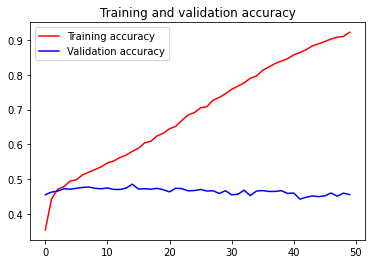

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

#Có thể thấy mô hình bị overfitting khá nặng, validation accuracy bão hòa từ rất sớm và không có dấu hiệu tăng nữa.

In [25]:
class Metrics():


    @staticmethod
    def computeMSE(y_true, y_pred):
        return np.mean((y_true-y_pred)**2)

    @staticmethod
    def computeMAE(y_true, y_pred):
        return np.mean(np.abs(y_true-y_pred))

    @staticmethod
    def computeSIA(y_true, y_pred, eps=2): #soft interval accuracy
        error = np.abs(y_true - y_pred)
        # print(y_true)
        # print(y_pred)
        # print(error)
        
        # print((error - eps) < 0 )
        res = np.mean(((error - eps) < 0 ) & (y_pred >= 0))
        return res



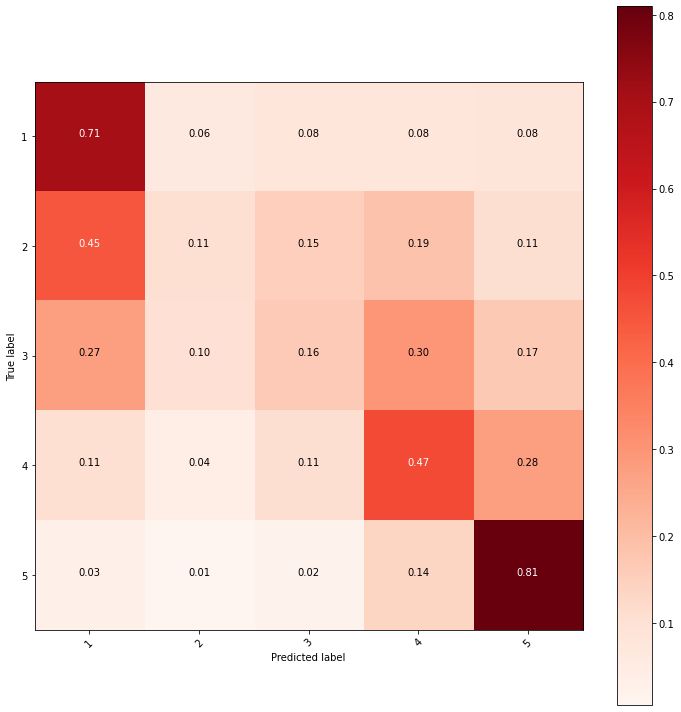

In [26]:
total_y_pred = tf.argmax(model.predict(X_test), axis=1)
total_y = y_test-1

confusion_matrix = tf.math.confusion_matrix(total_y, total_y_pred).numpy()



import matplotlib.pyplot as plt

import itertools
label_dict_test = {i+1:i for i in range(5)}



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = label_dict_test.keys()

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,
                      title= None, cmap= plt.cm.Reds)

plt.show()

Nhìn vào Confusion Matrix ở trên, ta thấy rating 1 và 5 sao có độ chính xác cao nhất, tuy nhiên mô hình vẫn nhầm lẫn trong việc phân loại các rating liên tiếp nhau. Chẳng hạn như (2 và 1), (3 và 2,4), (4 và 5). Điều này là hợp lí vì đây là một task khá khó, sentiment của các review comment khá khó để dự đoán một cách chính xác, nhất là các rating liên tiếp nhau (chẳng hạn như rating 2 và 3 rất khó để phân biệt), còn 1 sao và 5 sao thì lại rất dễ phân biệt.

Nếu ta thử áp dụng SIA metric với epsilon = 2, có nghĩa là cho phép sai số dự đoán rating là 1 (ví dụ rating đúng là 2 nhưng mô hình dự đoán 1 hoặc 3 thì vẫn coi như đúng), mô hình đạt được độ chính xác khá cao

In [27]:
Metrics.computeSIA(total_y, total_y_pred, eps=2)

0.7846924177396281